In [350]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [351]:
data = pd.read_csv('movie_profit.csv')

In [352]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401 entries, 0 to 3400
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3401 non-null   int64  
 1   release_date       3401 non-null   object 
 2   movie              3401 non-null   object 
 3   production_budget  3401 non-null   float64
 4   domestic_gross     3401 non-null   float64
 5   worldwide_gross    3401 non-null   float64
 6   distributor        3353 non-null   object 
 7   mpaa_rating        3264 non-null   object 
 8   genre              3401 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 239.3+ KB


In [353]:
data.head(5)

,Unnamed: 0,release_date,movie,production_budget,domestic_gross,worldwide_gross,distributor,mpaa_rating,genre
0,1,6/22/2007,Evan Almighty,175000000.0,100289690.0,1.741313e+08,Universal,PG,Comedy
1,2,7/28/1995,Waterworld,175000000.0,88246220.0,2.642462e+08,Universal,PG-13,Action
2,3,5/12/2017,King Arthur: Legend of the Sword,175000000.0,39175066.0,1.399507e+08,Warner Bros.,PG-13,Adventure
3,4,12/25/2013,47 Ronin,175000000.0,38362475.0,1.517168e+08,Universal,PG-13,Action
4,5,6/22/2018,Jurassic World: Fallen Kingdom,170000000.0,416769345.0,1.304866e+09,Universal,PG-13,Action


In [354]:
data['Unnamed: 0'].value_counts()

1       1
2260    1
2262    1
2263    1
2264    1
       ..
1138    1
1139    1
1140    1
1141    1
3401    1
Name: Unnamed: 0, Length: 3401, dtype: int64

In [355]:
data['distributor'].value_counts()

Warner Bros.            374
Sony Pictures           339
Universal               307
20th Century Fox        282
Paramount Pictures      267
                       ... 
InterStar Releasing       1
Providence Entertai…      1
Neon                      1
Lionsgate Premiere        1
Illuminare                1
Name: distributor, Length: 201, dtype: int64

In [356]:
data['mpaa_rating'].value_counts()

R        1514
PG-13    1092
PG        573
G          85
Name: mpaa_rating, dtype: int64

In [357]:
data['genre'].value_counts()

Drama        1236
Comedy        813
Action        573
Adventure     481
Horror        298
Name: genre, dtype: int64

### Dealing with missing Data

In [358]:
data.isna().sum()

Unnamed: 0             0
release_date           0
movie                  0
production_budget      0
domestic_gross         0
worldwide_gross        0
distributor           48
mpaa_rating          137
genre                  0
dtype: int64

In [359]:
data[data.isnull()['mpaa_rating'] == True]['genre'].value_counts()
# missing value spread dispread

Drama        38
Comedy       33
Horror       31
Action       27
Adventure     8
Name: genre, dtype: int64

In [360]:
data.drop(columns = 'Unnamed: 0', inplace = True)

In [361]:
data.dropna(inplace = True)

In [362]:
# gross is 0 seen quite weird
data.describe().T

,count,mean,std,min,25%,50%,75%,max
production_budget,3230.0,3.459218e+07,3.526337e+07,250000.0,10000000.00,22000000.0,49000000.0,1.750000e+08
domestic_gross,3230.0,4.726805e+07,5.973707e+07,0.0,6867944.50,27332972.5,63413288.0,4.745447e+08
worldwide_gross,3230.0,9.841706e+07,1.432841e+08,0.0,11779939.25,44044238.0,125201861.5,1.304866e+09


In [363]:
zero_gross = (data['domestic_gross'] == 0) & (data['worldwide_gross'] == 0)
data = data[~zero_gross]

In [364]:
data.duplicated().sum()
# no duplicated

0

### EDA

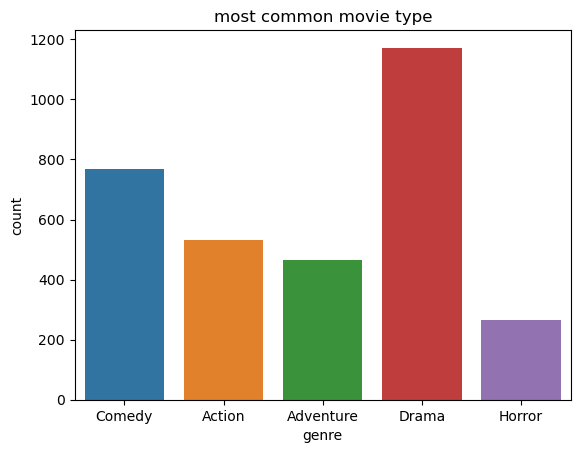

In [365]:
# Drama movies are probable the most common made
sns.countplot(data, x = 'genre')
plt.title('most common movie type')
plt.show()

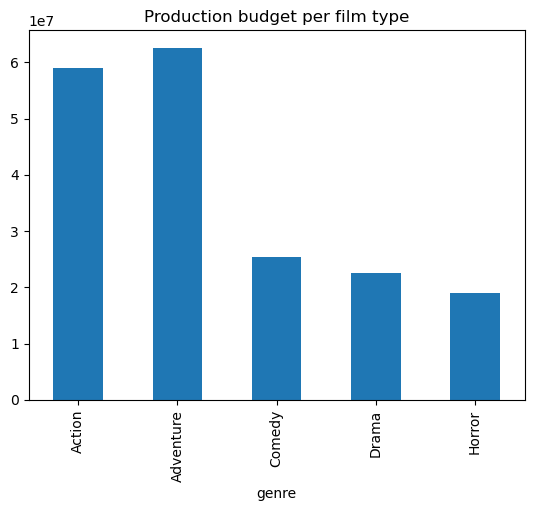

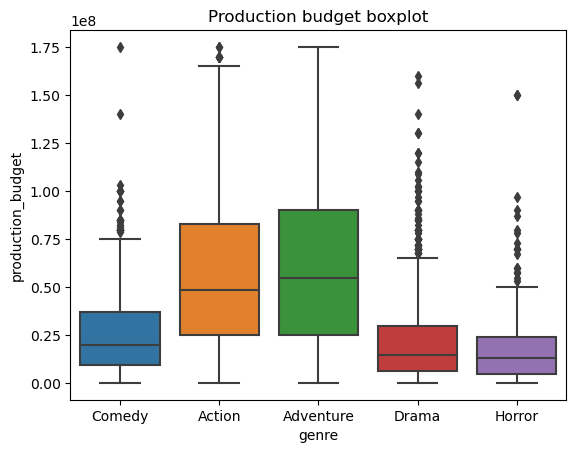

In [366]:
# Which type of movie had the highest production budget in average

data.groupby('genre')['production_budget'].agg('mean').plot(kind = 'bar')
plt.title('Production budget per film type')
plt.show()

sns.boxplot(data, x = 'genre', y = 'production_budget')
plt.title('Production budget boxplot')
plt.show()

# Adventure cost most

In [367]:
# Which type of movie made the most income in average ?

In [368]:
data['net_profit'] = (data['domestic_gross'].values + data['worldwide_gross'].values) - data['production_budget']

In [369]:
res = data.groupby('genre', sort = True)['worldwide_gross', 'domestic_gross', 'production_budget'] \
    .agg('mean')

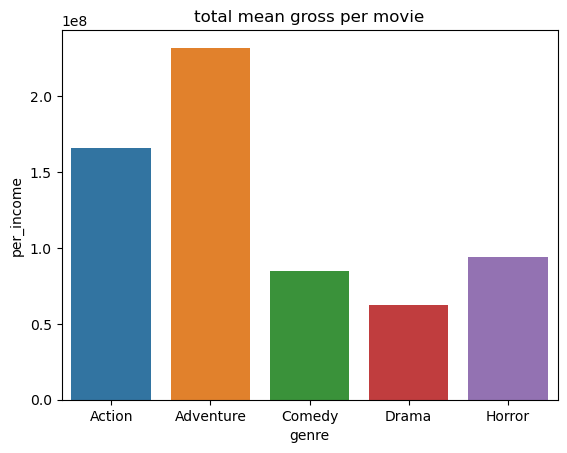

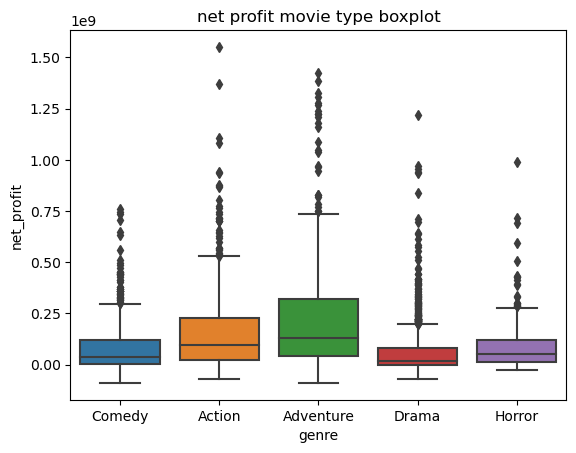

In [370]:
res['total_gross'] = res['domestic_gross'].values + res['worldwide_gross'].values
res['per_income'] = (res['total_gross'] - res['production_budget'])

res2 = res.reset_index()
sns.barplot(res2, x = 'genre', y = 'per_income')
plt.title('total mean gross per movie')
plt.show()
# Adventure movie are the most benefit movie type in average

sns.boxplot(data, x = 'genre', y = 'net_profit')
plt.title('net profit movie type boxplot')
plt.show()

In [371]:
# Top 10 profitable movies
data.sort_values(by = 'net_profit', ascending = False).head(10) \
    [['movie', 'distributor', 'mpaa_rating', 'genre', 'net_profit']]

,movie,distributor,mpaa_rating,genre,net_profit
4,Jurassic World: Fallen Kingdom,Universal,PG-13,Action,1.551636e+09
426,Minions,Universal,PG,Adventure,1.424827e+09
149,Star Wars Ep. I: The Phantom Menace,20th Century Fox,PG,Adventure,1.386589e+09
545,Jurassic Park,Universal,PG-13,Action,1.371521e+09
380,The Lion King,Walt Disney,G,Adventure,1.328818e+09
440,Shrek 2,Dreamworks SKG,PG,Adventure,1.308234e+09
253,Jumanji: Welcome to the Jungle,Sony Pictures,PG-13,Adventure,1.276267e+09
387,Despicable Me 2,Universal,PG,Adventure,1.267282e+09
2329,Star Wars Ep. IV: A New Hope,20th Century Fox,PG,Adventure,1.236596e+09
392,Despicable Me 3,Universal,PG,Adventure,1.224145e+09


In [372]:
# which type of movies usually made negative profit
neg_movie = data[((data['production_budget']) - (data['worldwide_gross']) - (data['domestic_gross'])) \
    >= 0]

In [373]:
neg_movie['total'] = neg_movie['production_budget'].values - neg_movie['worldwide_gross'].values - neg_movie['domestic_gross'].values
neg_movie.count()[0]

611

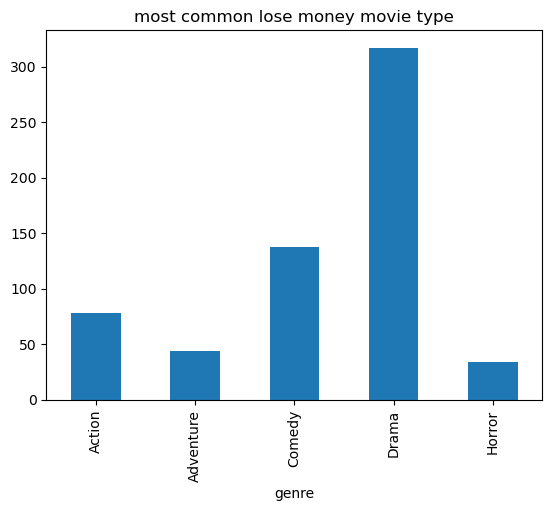

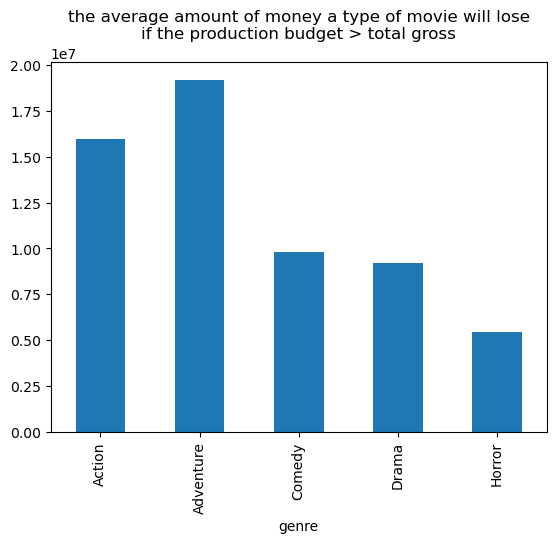

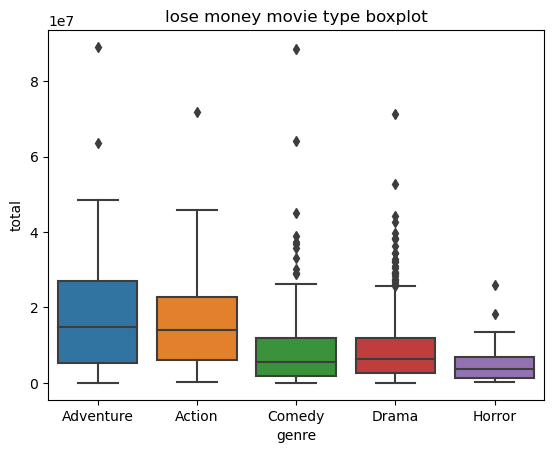

In [374]:
neg_movie.groupby('genre')['total'].agg('count').plot(kind = 'bar')
plt.title('most common lose money movie type')
plt.show()

neg_movie.groupby('genre')['total'].agg('mean').plot(kind = 'bar')
plt.title('the average amount of money a type of movie will lose' + '\n' \
          + 'if the production budget > total gross')
plt.show()

sns.boxplot(neg_movie, x = 'genre', y = 'total')
plt.title('lose money movie type boxplot')
plt.show()

### Looking for trends

In [375]:
data['release_date'] = pd.to_datetime(data['release_date'], format = '%m/%d/%Y')

In [376]:
data['Year'] = data['release_date'].dt.year
data['Month'] = data['release_date'].dt.month

In [428]:
df3 = data[['Year','genre']].value_counts().sort_values().reset_index()
df3 = pd.DataFrame(df3)

df3.columns.values[2] = 'count'
df3

,Year,genre,count
0,1936,Comedy,1
1,1969,Action,1
2,1959,Adventure,1
3,1956,Adventure,1
4,1960,Action,1
...,...,...,...
229,2014,Drama,59
230,2015,Drama,61
231,2010,Drama,63
232,2006,Drama,64


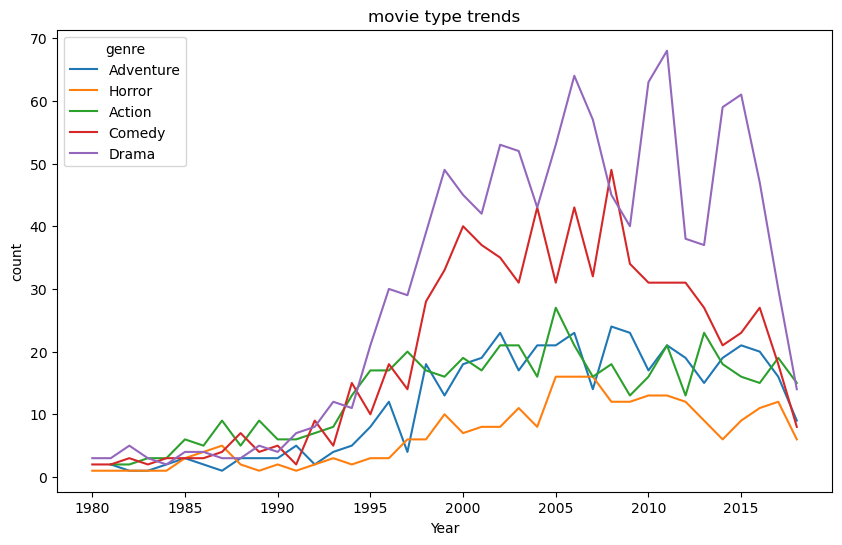

In [435]:
plt.figure(figsize = (10,6))
df3 = df3[df3['Year'] >= 1980]
sns.lineplot(df3, x = 'Year', y = 'count', hue = 'genre')
plt.title('movie type trends')
plt.show()